<a href="https://colab.research.google.com/github/Kmneverfail/Fuel_Inventory_Management_Optimization_Project/blob/main/M3_Medical_Insurance_Production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install --upgrade -q scikit-learn pycaret xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 99.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 96.2 MB/s eta 0:00:00
  

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as pt
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Read in training data

# Replace with your Google Drive shareable link
drive_url = "https://drive.google.com/file/d/122kxiprQhzR123mGnyGxSERg854FmbBF/view?usp=sharing"

# Convert the Google Drive URL to a direct download URL
file_id = drive_url.split('/d/')[1].split('/')[0]
download_url = f"https://drive.google.com/uc?id={file_id}"

# Read the CSV file into a DataFrame
df = pd.read_csv(download_url)

# Display the first few rows of the DataFrame
print(df.head())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# Read in test data

# Replace with your Google Drive shareable link
drive_url = "https://drive.google.com/file/d/1qZIgsTvpF4acFXosreetuGZyYaOjhSgM/view?usp=sharing"
# Convert the Google Drive URL to a direct download URL
file_id = drive_url.split('/d/')[1].split('/')[0]
download_url = f"https://drive.google.com/uc?id={file_id}"

# Read the CSV file into a DataFrame
df_test = pd.read_csv(download_url)

# Display the first few rows of the DataFrame
print(df_test.head())


   age  sex        bmi  children  smoker  region
0   58    0  30.338722         0       0       1
1   60    0  24.324606         0       0       0
2   27    0  18.228846         3       0       1
3   24    0  40.426077         0       1       2
4   19    0  35.872515         0       0       0


In [7]:
# Insert code blocks for engineering below

In [8]:
#shape
train_shape = df.shape
test_shape = df_test.shape

print("Training data shape:", train_shape)
print("Testing data shape:", test_shape)

Training data shape: (1338, 7)
Testing data shape: (267, 6)


In [9]:
#check nulls
train_na_count = df.isna().sum().sum()
test_na_count = df_test.isna().sum().sum()

print("Number of missing values in training data:", train_na_count)
print("Number of missing values in testing data:", test_na_count)

Number of missing values in training data: 0
Number of missing values in testing data: 0


In [10]:
#check dups
train_dup_count = df.duplicated().sum()
test_dup_count = df_test.duplicated().sum()

print("Number of duplicate rows in training data:", train_dup_count)
print("Number of duplicate rows in testing data:", test_dup_count)

Number of duplicate rows in training data: 1
Number of duplicate rows in testing data: 0


In [11]:
#check unique values
train_uniques = df.nunique()
test_uniques = df_test.nunique()

print("Unique values in training data:\n", train_uniques)
print("Unique values in testing data:\n", test_uniques)

Unique values in training data:
 age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64
Unique values in testing data:
 age          47
sex           2
bmi         266
children      6
smoker        2
region        4
dtype: int64


(array([137.,  57.,  28.,  56.,  28.,  56.,  28.,  54.,  27.,  52.,  26.,
         50.,  25.,  50.,  27.,  54.,  54.,  29.,  58.,  29.,  57.,  29.,
         57.,  28.,  52.,  26.,  50.,  23.,  46.,  45.]),
 array([18.        , 19.53333333, 21.06666667, 22.6       , 24.13333333,
        25.66666667, 27.2       , 28.73333333, 30.26666667, 31.8       ,
        33.33333333, 34.86666667, 36.4       , 37.93333333, 39.46666667,
        41.        , 42.53333333, 44.06666667, 45.6       , 47.13333333,
        48.66666667, 50.2       , 51.73333333, 53.26666667, 54.8       ,
        56.33333333, 57.86666667, 59.4       , 60.93333333, 62.46666667,
        64.        ]),
 <BarContainer object of 30 artists>)

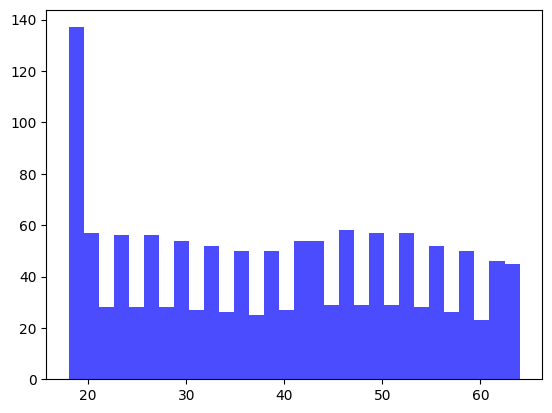

In [12]:
import matplotlib.pyplot as plt
plt.hist(df['age'], bins=30, color='blue', alpha=0.7)

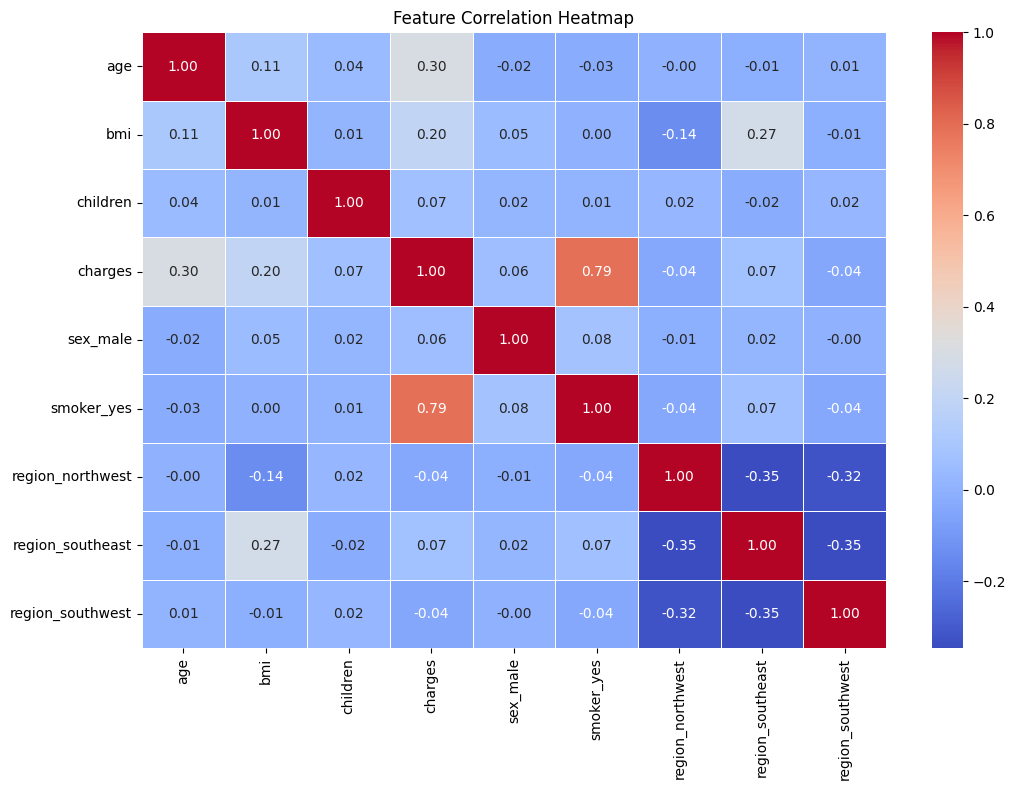

In [13]:
import seaborn as sns

#Calculate the correlation coefficient between all numerical variables in the data set
df_encoded = pd.get_dummies(df, drop_first=True)  # drop_first=True avoids dummy variable trap

# Compute the correlation matrix
corr_matrix = df_encoded.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 75.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 448.7/448.7 kB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 92.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 101.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385.8 kB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
age,int64,0.000000,3,18.000000,64.000000,No issue
sex,object,0.000000,0,,,No issue
bmi,float64,0.000000,NA,15.960000,53.130000,Column has 9 outliers greater than upper bound (47.32) or lower than lower bound(13.67). Cap them or remove them.
children,int64,0.000000,0,0.000000,5.000000,No issue
smoker,object,0.000000,0,,,No issue
region,object,0.000000,0,,,No issue
charges,float64,0.000000,NA,1121.873900,63770.428010,Column has 139 outliers greater than upper bound (34524.78) or lower than lower bound(-13120.72). Cap them or remove them.


Number of All Scatter Plots = 3


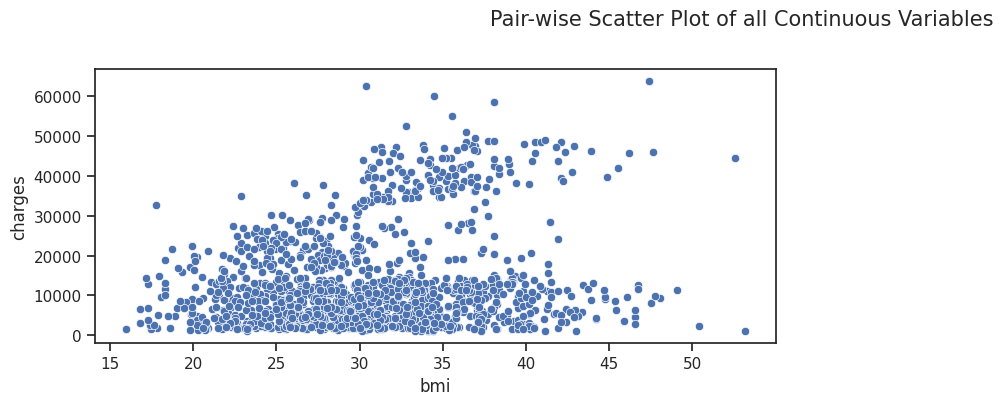

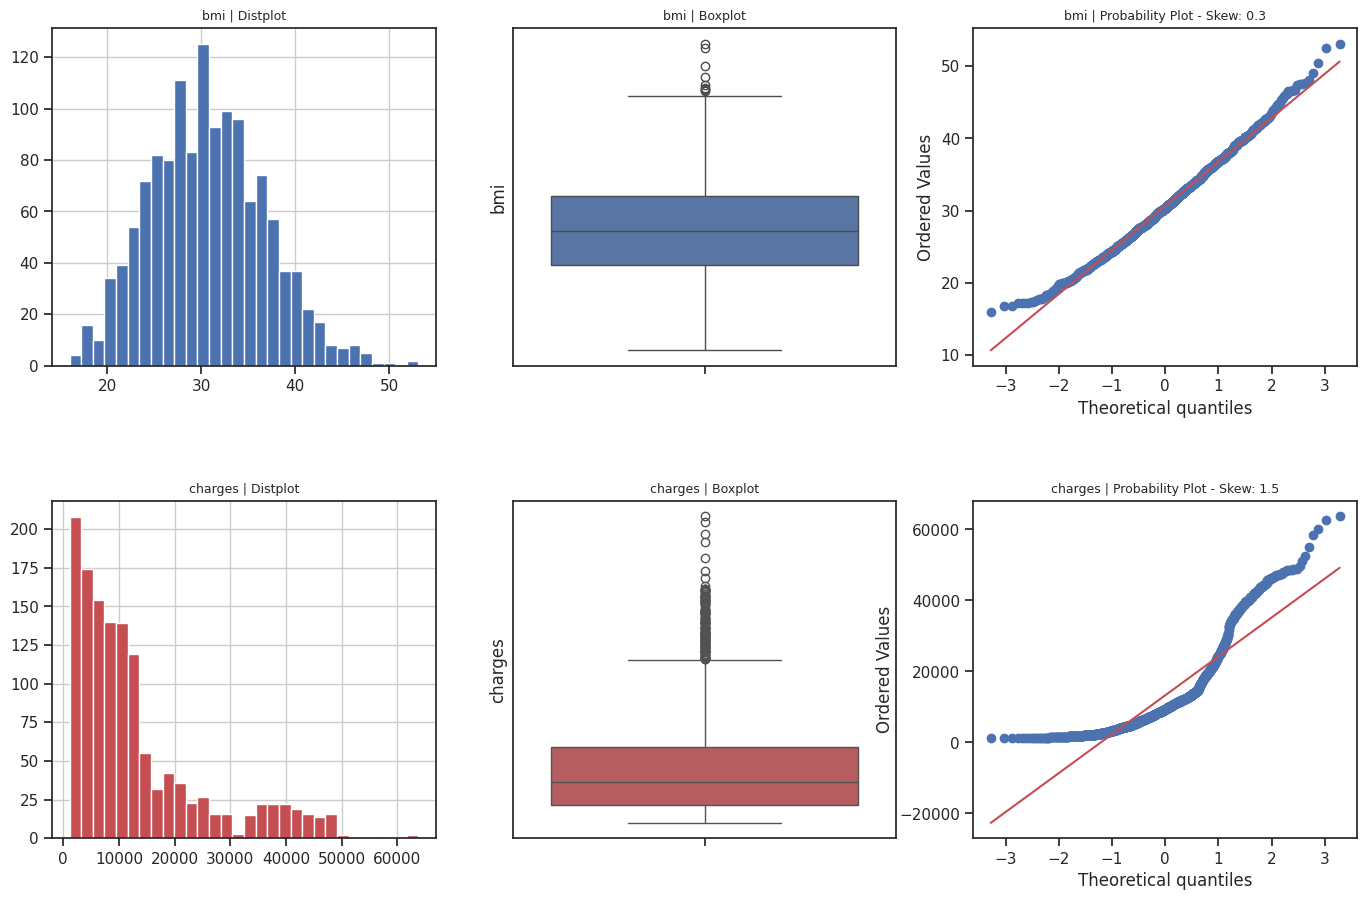

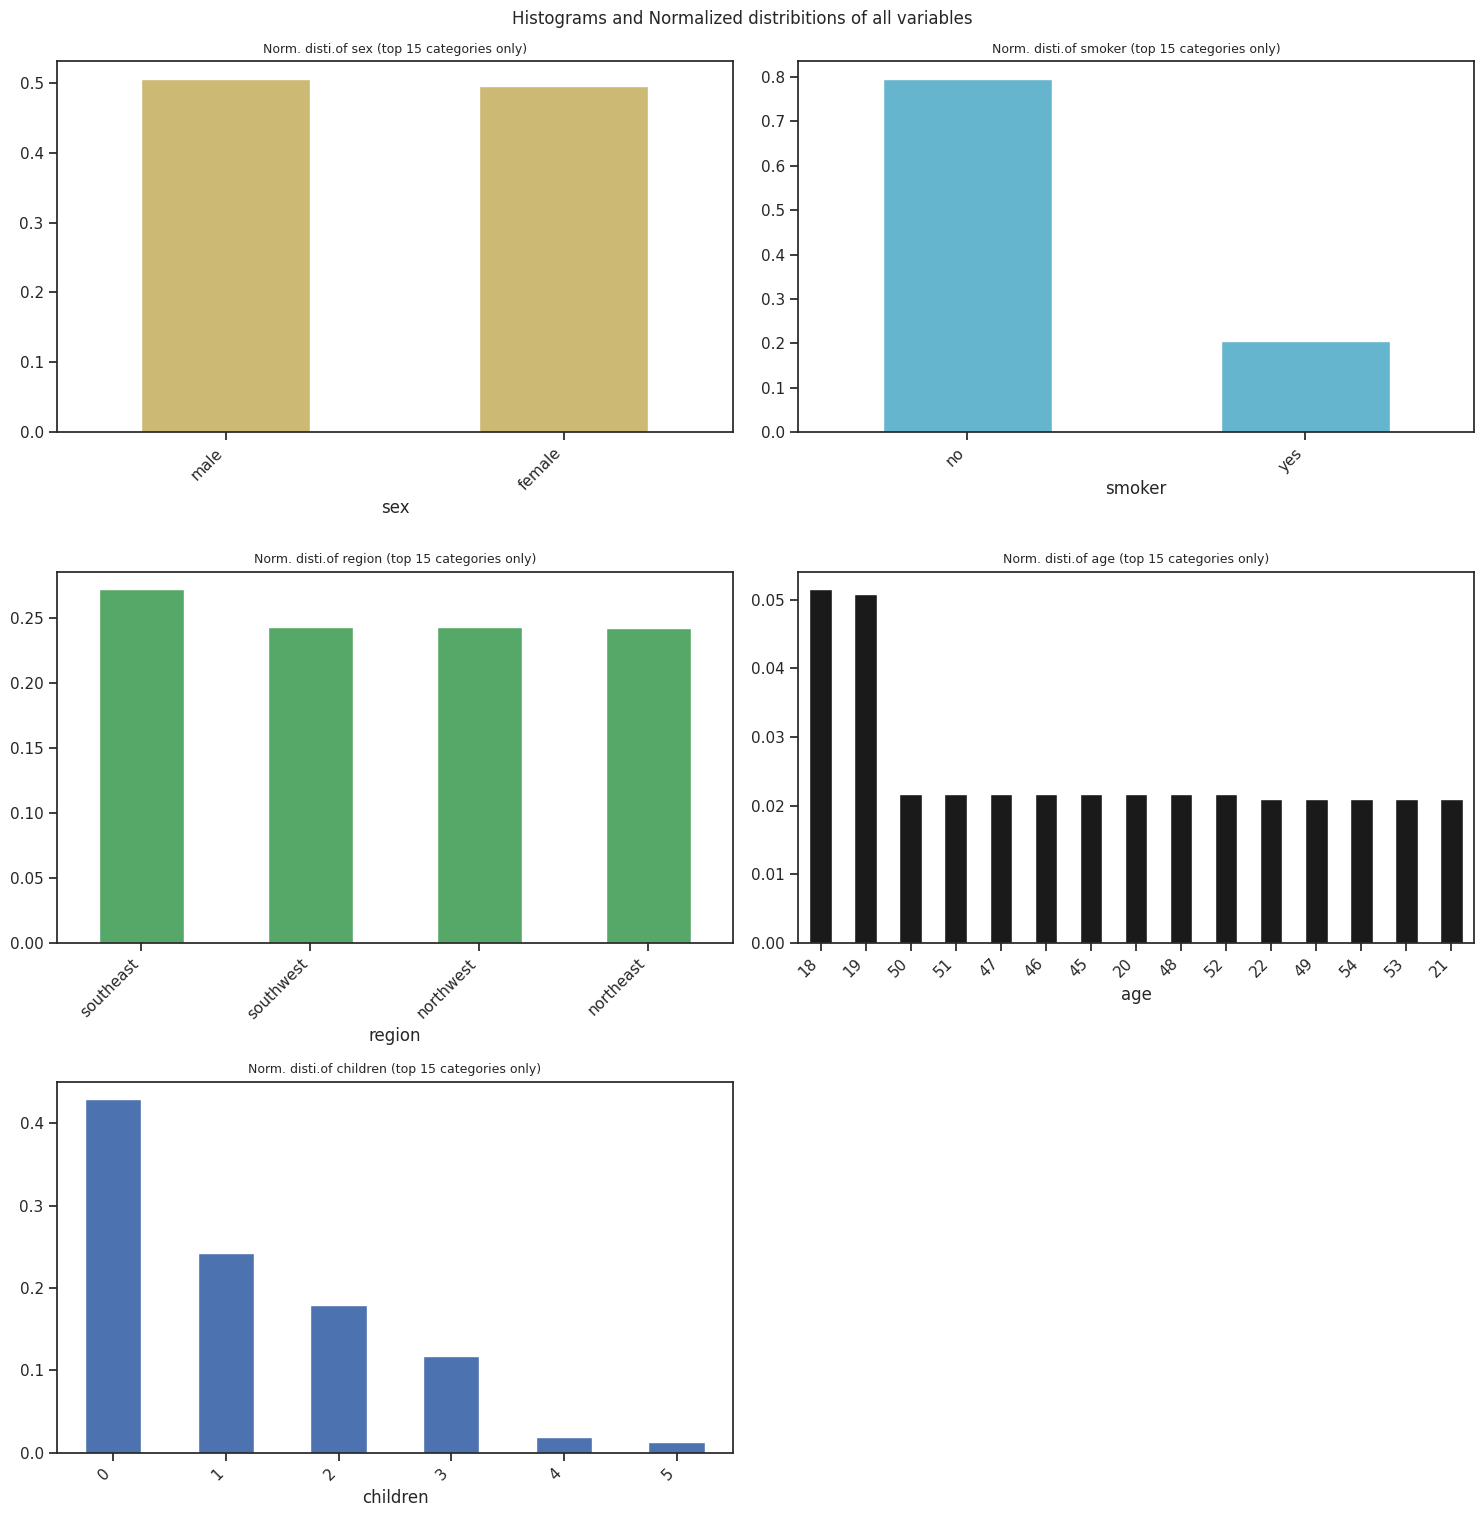

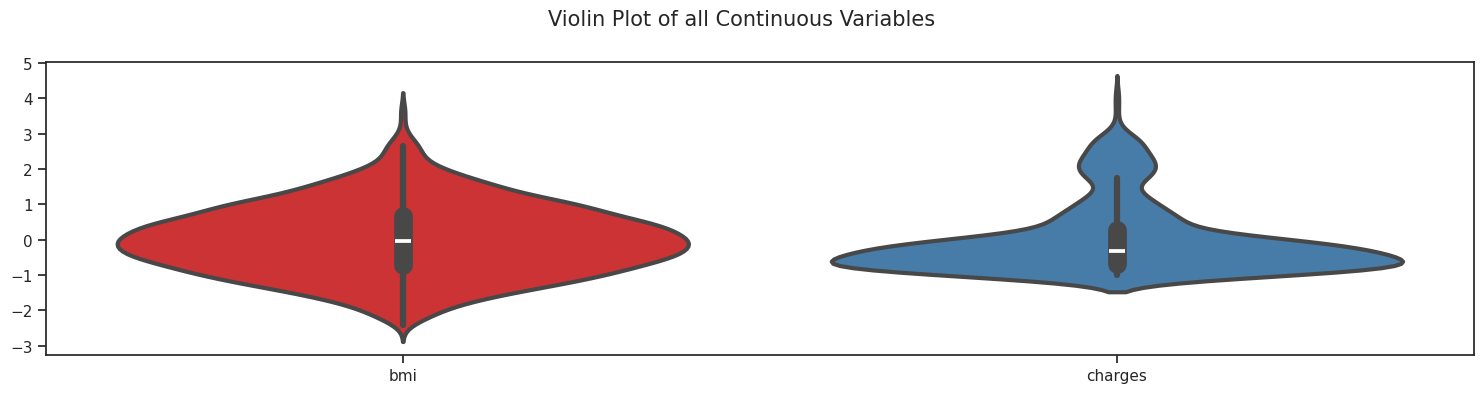

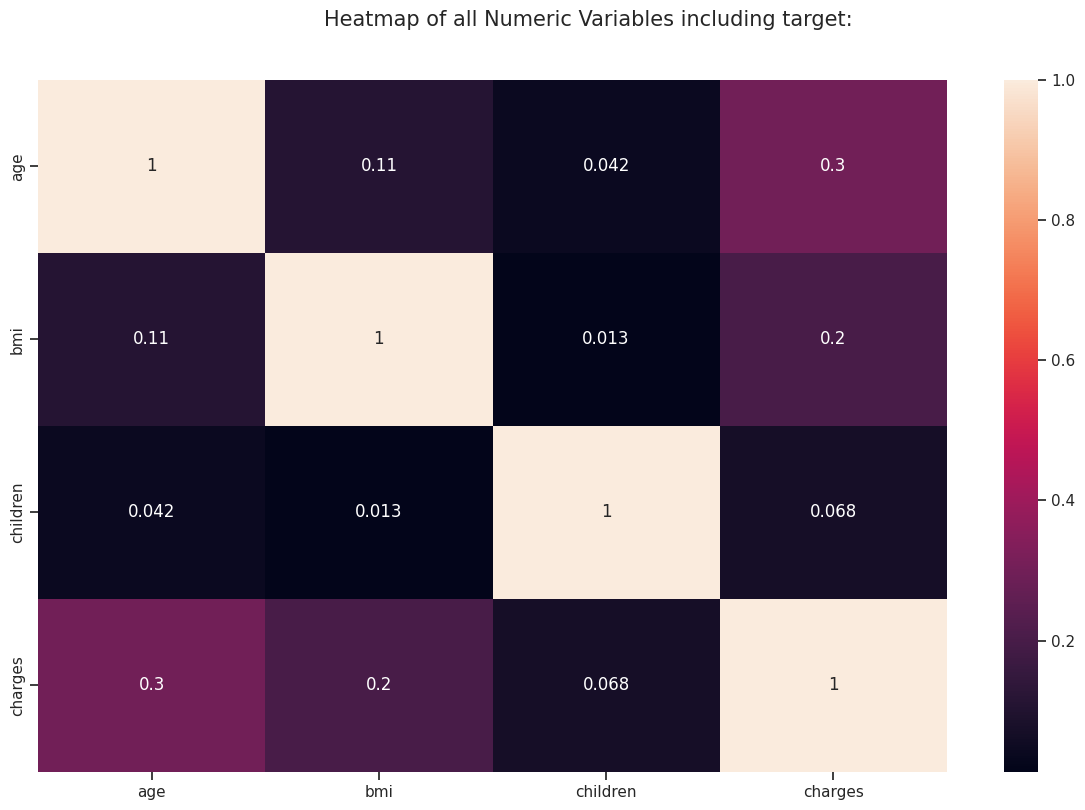

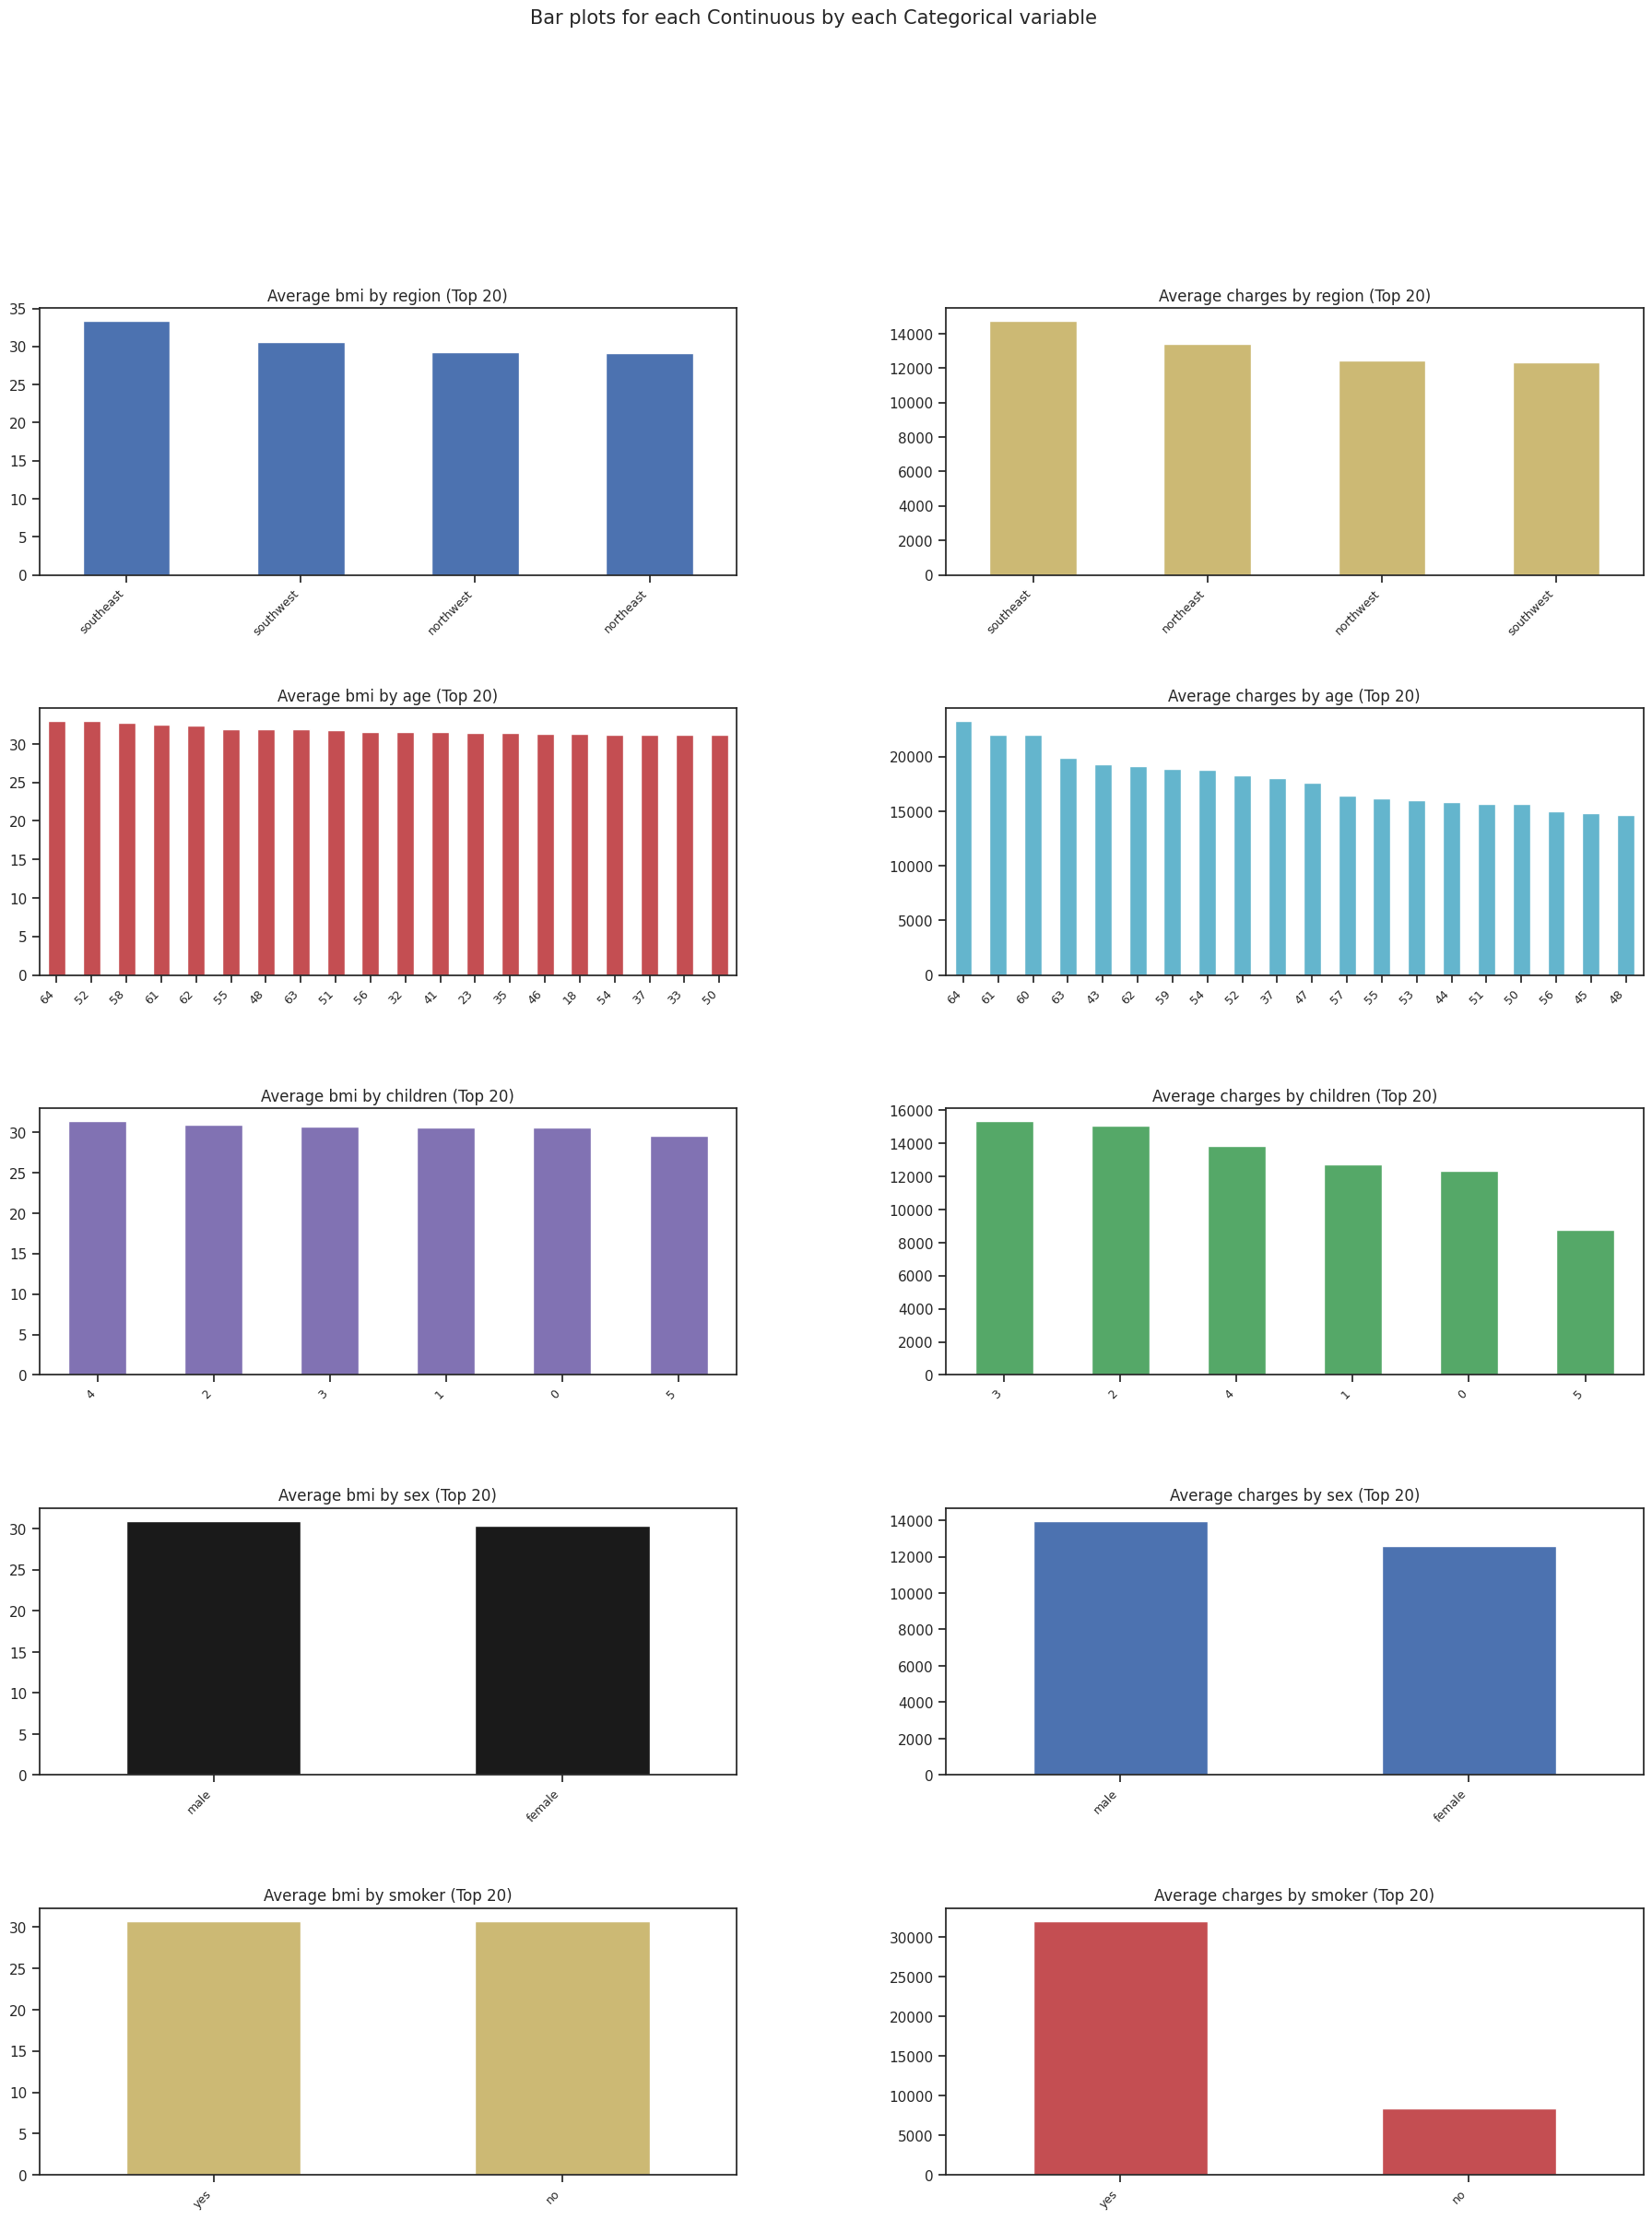

All Plots done
Time to run AutoViz = 4 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [14]:
!pip install -q pycaret autoviz --upgrade psynlig
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline

dftc = AutoViz_Class().AutoViz(filename='', sep ='', dfte = df, header = 0,
verbose = 1, lowess = False, chart_format ='png', max_rows_analyzed = 2000, max_cols_analyzed = 30)

In [15]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [16]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder

df_train = df

# Ensure 'region' is of type string
df_train["region"] = df_train["region"].astype(str)
df_test["region"] = df_test["region"].astype(str)

# Encode categorical variables
label_encoders = {}
for col in ["sex", "smoker"]:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])
    label_encoders[col] = le

# Define ordinal encoding for 'region'
region_order = ["northwest", "northeast", "southeast", "southwest"]
ordinal_encoder = OrdinalEncoder(categories=[region_order])
df_train["region"] = ordinal_encoder.fit_transform(df_train[["region"]]).astype(int)

# Ensure consistency in data types
df_train["region"] = df_train["region"].astype(int)
df_test["region"] = df_test["region"].astype(int)

In [17]:
df_test

,age,sex,bmi,children,smoker,region
0,58,0,30.338722,0,0,1
1,60,0,24.324606,0,0,0
2,27,0,18.228846,3,0,1
3,24,0,40.426077,0,1,2
4,19,0,35.872515,0,0,0
5,41,0,29.167936,1,0,3
6,39,0,26.251689,1,0,0
7,18,1,31.582041,0,0,1
8,22,0,28.919296,0,0,1
9,20,1,33.749061,0,0,3


In [18]:
# Insert code blocks for regressor(s) below

In [19]:
from pycaret.regression import *
reg_setup = setup(
    data=df,
    train_size=0.8, #Splits the data into 80% training and 20% testing.
    target='charges', #Sets ‘charges’ as the dependent variable (what we want to predict)
    normalize=True,
    session_id=42, #Sets a random seed for reproducibility.
    fold=5 #Uses 5-fold cross-validation
    )

best_model = compare_models()
tuned_model = tune_model(best_model)
final_model = finalize_model(tuned_model)
predictions = predict_model(final_model)

,Description,Value
0,Session id,42
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 7)"
5,Transformed train set shape,"(1070, 7)"
6,Transformed test set shape,"(268, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2661.6743,22308764.3676,4689.8614,0.8419,0.4455,0.3153,0.1860
rf,Random Forest Regressor,2744.8814,24549899.4687,4932.0931,0.8264,0.4581,0.3183,0.2960
lightgbm,Light Gradient Boosting Machine,2956.9134,25394869.1680,5011.5324,0.8200,0.5231,0.3648,0.3300
et,Extra Trees Regressor,2799.9724,26923477.2671,5173.4467,0.8098,0.4823,0.3294,0.2440
xgboost,Extreme Gradient Boosting,3152.3390,29115300.0000,5379.7081,0.7941,0.5960,0.4049,1.4140
knn,K Neighbors Regressor,3311.7673,29212363.2000,5394.4769,0.7940,0.4924,0.3677,0.0300
ada,AdaBoost Regressor,4645.8686,30893948.6161,5555.0622,0.7829,0.6589,0.7949,0.0560
br,Bayesian Ridge,4244.2101,37826754.8000,6136.9718,0.7339,0.5761,0.4249,0.0220
llar,Lasso Least Angle Regression,4241.1918,37826446.4000,6136.8368,0.7339,0.5867,0.4242,0.0240
lar,Least Angle Regression,4241.3709,37827515.6000,6136.9163,0.7339,0.5889,0.4242,0.0220


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2675.8179,23718726.2544,4870.1875,0.8321,0.4996,0.3414
1,2500.3394,14624596.3281,3824.2119,0.9098,0.3880,0.3074
2,2937.1999,25508425.8201,5050.5867,0.8032,0.4820,0.3578
3,2998.0465,28948877.5821,5380.4161,0.7874,0.4813,0.3222
4,2809.2984,23279062.4363,4824.8381,0.8450,0.4899,0.3641
Mean,2784.1404,23215937.6842,4790.0480,0.8355,0.4682,0.3386
Std,180.0515,4736877.2225,520.9390,0.0424,0.0406,0.0213


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2142.8011,15145806.9980,3891.7614,0.9024,0.3709,0.2758


In [20]:
final_model

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'sex', 'bmi', 'children',
                                             'smoker', 'region'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('normalize', TransformerWrapper(transformer=StandardScaler())),
                ('actual_estimator',
                 GradientBoostingRegressor(random_state=42))])

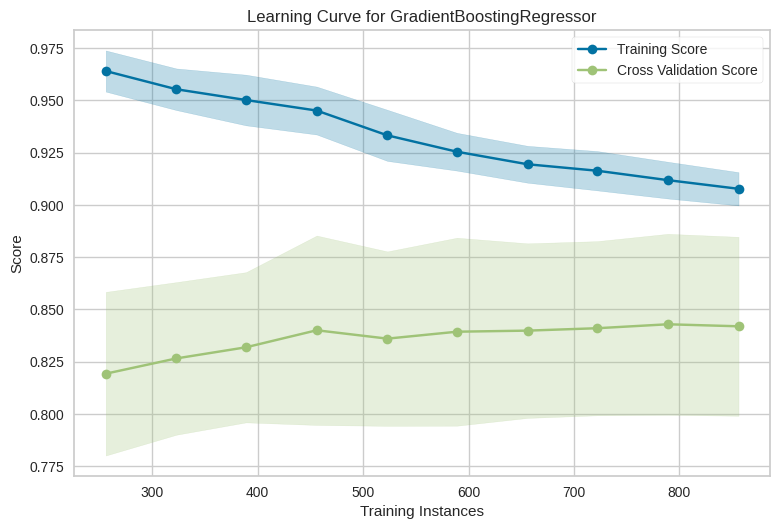

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2081.3619,14719175.7892,3836.5578,0.8996,0.3446,0.2434


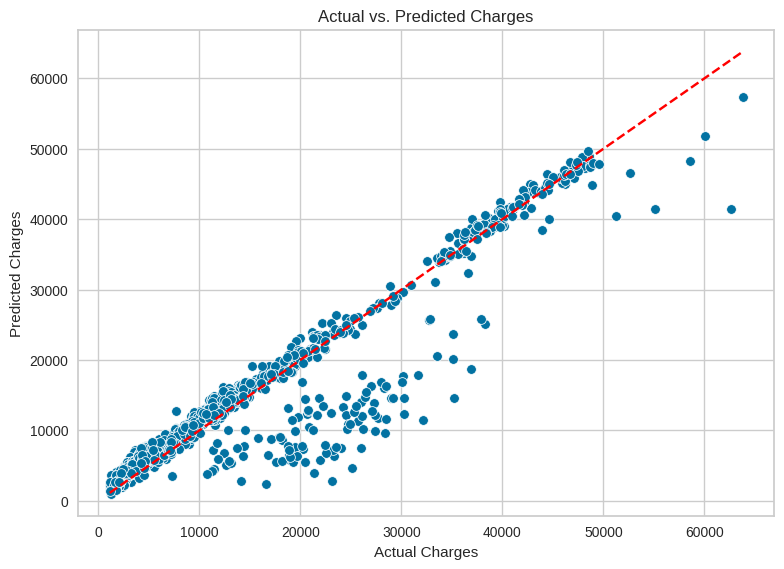

In [21]:
# Learning Curve
plot_model(final_model, plot="learning")

# Generate Predictions
predictions = predict_model(final_model, data=df)

# Scatter Plot: Actual vs. Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=predictions['charges'], y=predictions['prediction_label'])
plt.plot([min(predictions['charges']), max(predictions['charges'])],
         [min(predictions['charges']), max(predictions['charges'])],
         color="red", linestyle="--")  # 45-degree reference line
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Charges")
plt.show()

In [22]:
from google.colab import files

# Assuming final_model is your trained model and X_test is your test dataset
# Generate predictions
predictions = final_model.predict(df_test)

# Create a DataFrame with ID and TARGET columns
submission_df = pd.DataFrame({
    'ID': range(1, len(df_test) + 1),
    'TARGET': predictions
})

# Save to submit.csv
submission_df.to_csv('submit_PyCaret.csv', index=False)

print("submit_PyCaret.csv file created successfully!")

# # Download the CSV file to local machine
files.download('submit_PyCaret.csv')

submit_PyCaret.csv file created successfully!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Extract specific columns from df_train
df_train = df_train[['age', 'bmi', 'smoker', 'charges']]

# Extract specific columns from df_test
df_test = df_test[['age', 'bmi', 'smoker']]

Optimal tree depth: 5
Average MSE across 10 folds: 22255995.9520


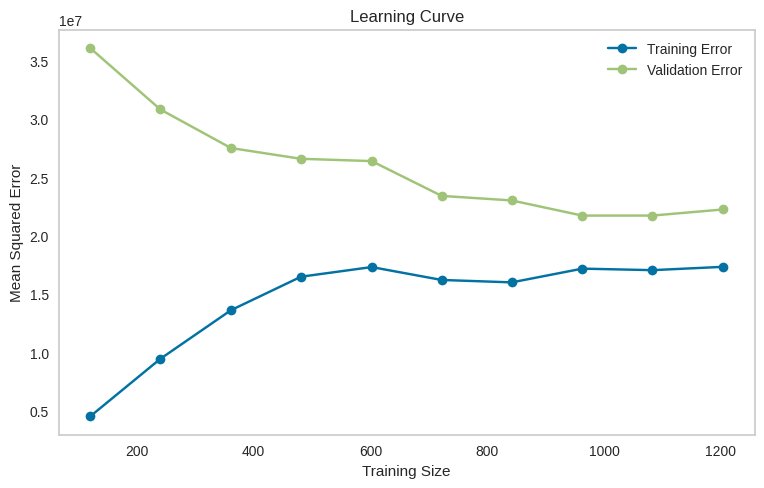

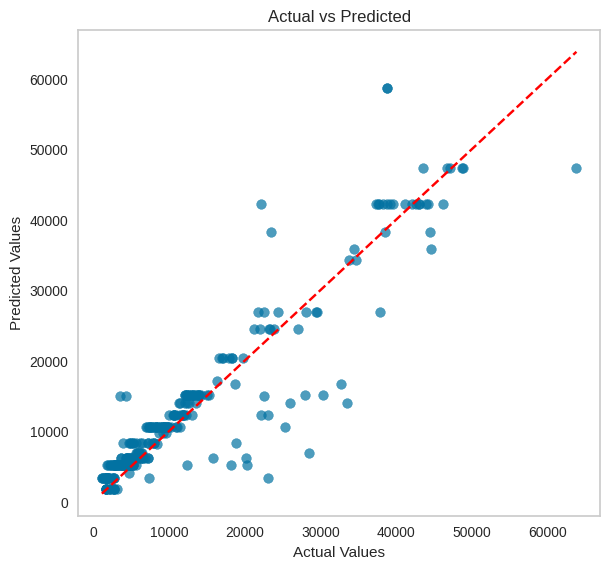

In [23]:
from sklearn.model_selection import cross_val_score, learning_curve, KFold, train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Sample data setup (replace df_train with actual data)
X = df_train.drop(columns=["charges"])  # Adjust "target" to match your dataset
y = df_train["charges"]

# Robust scaling
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Optimize tree depth using GridSearchCV
param_grid = {'max_depth': range(1, 21)}
model = DecisionTreeRegressor()
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_scaled, y)
optimal_depth = grid_search.best_params_['max_depth']
print(f"Optimal tree depth: {optimal_depth}")

# Regression Tree Model with optimized depth
model = DecisionTreeRegressor(max_depth=optimal_depth)

# 10-Fold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
mse_scores = -cross_val_score(model, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')
mean_mse = np.mean(mse_scores)
print(f"Average MSE across 10 folds: {mean_mse:.4f}")

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(model, X_scaled, y, cv=kf, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores_mean, label='Training Error', marker='o')
plt.plot(train_sizes, test_scores_mean, label='Validation Error', marker='o')
plt.xlabel("Training Size")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve")
plt.legend()
plt.grid()
plt.show()

# Train final model and generate predictions
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
final_model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Actual vs. Predicted Plot
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.grid()
plt.show()


In [25]:
final_model

DecisionTreeRegressor(max_depth=5)

In [26]:
# Generate predictions
predictions = final_model.predict(df_test)

# Create a DataFrame with ID and TARGET columns
submission_df = pd.DataFrame({
    'ID': range(1, len(df_test) + 1),
    'TARGET': predictions
})

# Save to submit_RregerssionTree.csv
submission_df.to_csv('submit_RegressionTree.csv', index=False)

print("submit_RegressionTree.csv file created successfully!")

# # Download the CSV file to local machine
files.download('submit_RegressionTree.csv')

submit_RegressionTree.csv file created successfully!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Optimal tree depth: 4
Average MSE across 10 folds: 20694044.2178


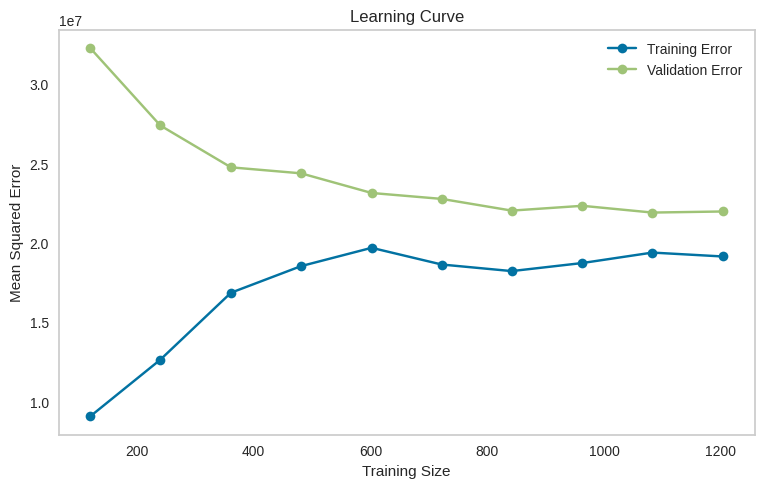

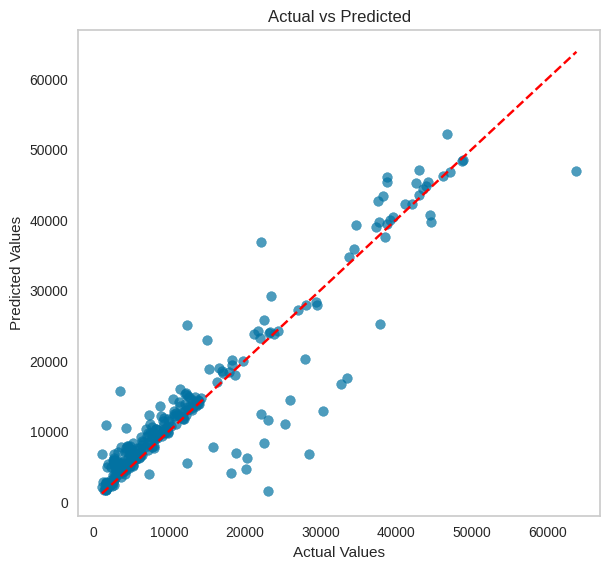

In [29]:
from sklearn.ensemble import RandomForestRegressor

X = df_train.drop(columns=["charges"])  # Adjust "target" to match your dataset
y = df_train["charges"]

# Robust scaling
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Optimize tree depth using GridSearchCV
param_grid = {'max_depth': range(1, 21)}
model = RandomForestRegressor()
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_scaled, y)
optimal_depth = grid_search.best_params_['max_depth']
print(f"Optimal tree depth: {optimal_depth}")

# Regression Tree Model with optimized depth
model = RandomForestRegressor(max_depth=optimal_depth)

# 10-Fold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
mse_scores = -cross_val_score(model, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')
mean_mse = np.mean(mse_scores)
print(f"Average MSE across 10 folds: {mean_mse:.4f}")

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(final_model, X_scaled, y, cv=10, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores_mean, label='Training Error', marker='o')
plt.plot(train_sizes, test_scores_mean, label='Validation Error', marker='o')
plt.xlabel("Training Size")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve")
plt.legend()
plt.grid()
plt.show()

# Train final model and generate predictions
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
final_model = RandomForestRegressor(max_depth=10, random_state=42)  # Adjust parameters as needed
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

# Actual vs. Predicted Plot
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.grid()
plt.show()


In [30]:
final_model

RandomForestRegressor(max_depth=10, random_state=42)

In [31]:
# Generate predictions
predictions = final_model.predict(df_test)

# Create a DataFrame with ID and TARGET columns
submission_df = pd.DataFrame({
    'ID': range(1, len(df_test) + 1),
    'TARGET': predictions
})

# Save to submit_RregerssionTree.csv
submission_df.to_csv('submit_RandomForest.csv', index=False)

print("submit_RandomForest.csv file created successfully!")

# # Download the CSV file to local machine
files.download('submit_RandomForest.csv')



submit_RandomForest.csv file created successfully!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>